### **1. Descriptor calculation**

 1.1 Install PADELpy

 1.2 Import dataset

 1.3 Descriptor calculation

 1.4 Define X, Y

### **2. modeling**

 2.1 Data splitting

 2.2 Decision tree modeling, Random forest modeling, MLP modeling

 2.3 Model evaluation

### **3. Shap permutation explainer**


**1.1 Install PADELpy**

In [ ]:
! pip install padelpy

     |████████████████████████████████| 20.9 MB 6.1 MB/s 


In [ ]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2021-10-26 05:03:47--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2021-10-26 05:03:47--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2021-10-26 05:03:47 (79.1 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprints_xm

In [ ]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [ ]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [ ]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

**1.2 Import dataset**

In [ ]:
import pandas as pd

df = pd.read_csv('https://github.com/GitGears/CYP/raw/main/CYP_dataset.csv')
df.head(2)

,ID,SMILES,pIC50,activity
0,CHEMBL2392004,Cc1nccn1C(=O)O[C@H]1CC[C@@]2(C)C(=CC[C@H]3[C@@...,4.03,3
1,CHEMBL2112761,C[C@H](N)[C@H]1CC[C@H]2[C@@H]3CC=C4C[C@@H](O)C...,4.05,3


In [ ]:
df.tail(2)

,ID,SMILES,pIC50,activity
665,CHEMBL4127656,CC(C)S(=O)(=O)N1CCN(c2ccc(/C=C/c3cc(F)cc(-c4cc...,9.00,1
666,CHEMBL3913908,CCS(=O)(=O)N1CCN(c2ccc(OC[C@@H]3CO[C@@](Cn4ccn...,9.14,1


In [ ]:
df

,ID,SMILES,pIC50,activity
0,CHEMBL2392004,Cc1nccn1C(=O)O[C@H]1CC[C@@]2(C)C(=CC[C@H]3[C@@...,4.03,3
1,CHEMBL2112761,C[C@H](N)[C@H]1CC[C@H]2[C@@H]3CC=C4C[C@@H](O)C...,4.05,3
2,CHEMBL4109884,CC(C)(CNC(=O)c1ccc2c(c1)CC[C@@H]1[C@@H]2CC[C@]...,4.07,3
3,CHEMBL109347,O=C(NCc1cccnc1)C12CC3CC(CC(C3)C1)C2,4.16,3
4,CHEMBL488,CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,4.22,3
...,...,...,...,...
662,CHEMBL310662,C[C@]12CCC3c4ccc(O)cc4CCC3C1CC=C2c1cccnc1,8.74,1
663,CHEMBL3666697,Cc1cc(NS(C)(=O)=O)ccc1-c1cnccc1OCC(F)(F)F,8.85,1
664,CHEMBL3696099,Cc1ccncc1-c1cccc2c(-c3ccccc3)noc12,8.96,1
665,CHEMBL4127656,CC(C)S(=O)(=O)N1CCN(c2ccc(/C=C/c3cc(F)cc(-c4cc...,9.00,1


In [ ]:
df2 = pd.concat( [df['SMILES'],df['ID']], axis=1 )
df2.to_csv('molecule.smi', sep='\t', index=False, header=False)
df2

,SMILES,ID
0,Cc1nccn1C(=O)O[C@H]1CC[C@@]2(C)C(=CC[C@H]3[C@@...,CHEMBL2392004
1,C[C@H](N)[C@H]1CC[C@H]2[C@@H]3CC=C4C[C@@H](O)C...,CHEMBL2112761
2,CC(C)(CNC(=O)c1ccc2c(c1)CC[C@@H]1[C@@H]2CC[C@]...,CHEMBL4109884
3,O=C(NCc1cccnc1)C12CC3CC(CC(C3)C1)C2,CHEMBL109347
4,CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,CHEMBL488
...,...,...
662,C[C@]12CCC3c4ccc(O)cc4CCC3C1CC=C2c1cccnc1,CHEMBL310662
663,Cc1cc(NS(C)(=O)=O)ccc1-c1cnccc1OCC(F)(F)F,CHEMBL3666697
664,Cc1ccncc1-c1cccc2c(-c3ccccc3)noc12,CHEMBL3696099
665,CC(C)S(=O)(=O)N1CCN(c2ccc(/C=C/c3cc(F)cc(-c4cc...,CHEMBL4127656


In [ ]:
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

**1.3 Fingerprint calculation**

In [ ]:
from padelpy import padeldescriptor

fingerprint = 'KlekotaRoth'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #KlekotaRoth.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, #'KlekotaRoth.csv'
                #descriptortypes='KlekotaRothprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
df3 = descriptors

**1.4 Define X and Y**

In [ ]:
X = descriptors.drop('Name', axis=1)
Y = df['pIC50']

X

,KRFP1,KRFP2,KRFP3,KRFP4,KRFP5,KRFP6,KRFP7,KRFP8,KRFP9,KRFP10,KRFP11,KRFP12,KRFP13,KRFP14,KRFP15,KRFP16,KRFP17,KRFP18,KRFP19,KRFP20,KRFP21,KRFP22,KRFP23,KRFP24,KRFP25,KRFP26,KRFP27,KRFP28,KRFP29,KRFP30,KRFP31,KRFP32,KRFP33,KRFP34,KRFP35,KRFP36,KRFP37,KRFP38,KRFP39,KRFP40,...,KRFP4821,KRFP4822,KRFP4823,KRFP4824,KRFP4825,KRFP4826,KRFP4827,KRFP4828,KRFP4829,KRFP4830,KRFP4831,KRFP4832,KRFP4833,KRFP4834,KRFP4835,KRFP4836,KRFP4837,KRFP4838,KRFP4839,KRFP4840,KRFP4841,KRFP4842,KRFP4843,KRFP4844,KRFP4845,KRFP4846,KRFP4847,KRFP4848,KRFP4849,KRFP4850,KRFP4851,KRFP4852,KRFP4853,KRFP4854,KRFP4855,KRFP4856,KRFP4857,KRFP4858,KRFP4859,KRFP4860
0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
663,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
664,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
665,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y

0      4.03
1      4.05
2      4.07
3      4.16
4      4.22
       ... 
662    8.74
663    8.85
664    8.96
665    9.00
666    9.14
Name: pIC50, Length: 667, dtype: float64

**2.1 Data splitting**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((533, 4860), (134, 4860))

In [ ]:
Y_train.shape, Y_test.shape

((533,), (134,))

**Decision tree modeling**

In [ ]:
# decision tree modeling
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf = clf.fit(X_train, Y_train)

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X, Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

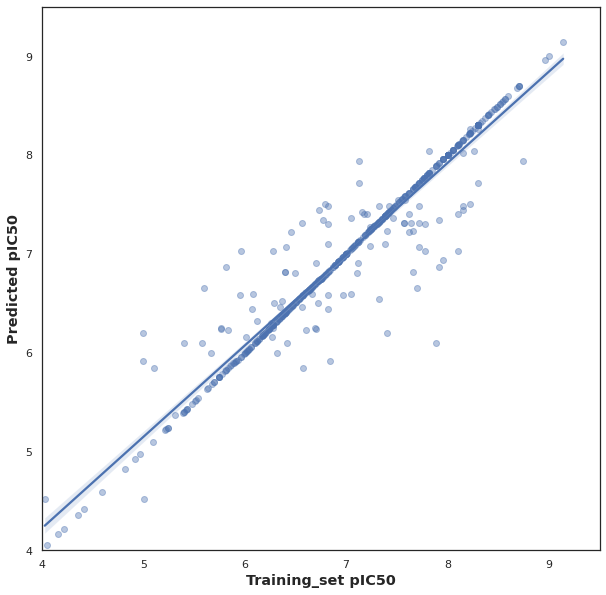

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_train, Y_train_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Training_set pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(4, 9.5)
ax.set_ylim(4, 9.5)
ax.figure.set_size_inches(10, 10)
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

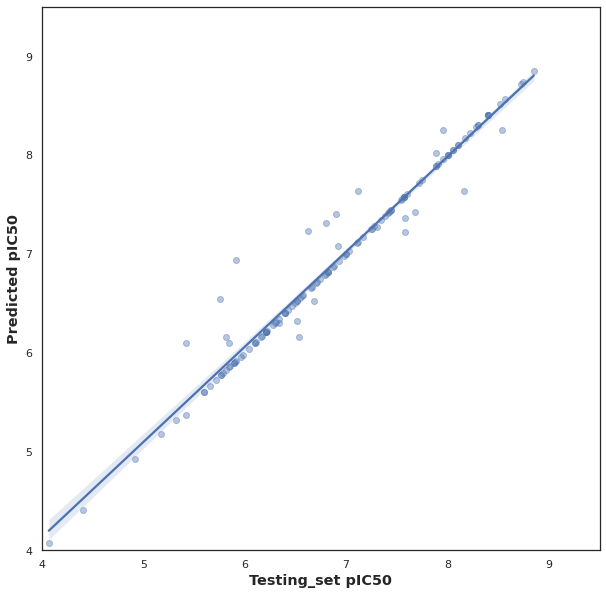

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_test_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Testing_set pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(4, 9.5)
ax.set_ylim(4, 9.5)
ax.figure.set_size_inches(10, 10)
plt.show

In [ ]:
#evaluation of training set
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import missingno as msno # plotting missing data
import seaborn as sns # plotting library

Y_pred = clf.predict(X_train)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = metrics.mean_absolute_error(Y_train, Y_train_pred)
MSE = metrics.mean_squared_error(Y_train, Y_train_pred)

# Printing the metrics
print('Suppport Vector Regression Accuracy: ', clf.score(X_train,Y_train_pred))
print('R2 square:',metrics.r2_score(Y_train, Y_train_pred))
print('MAE: ', MAE)
print('MSE: ', MSE)

Suppport Vector Regression Accuracy:  0.9937230037668522
R2 square: 0.9232613161548887
MAE:  0.09035334584115076
MSE:  0.0636760631644778


In [ ]:
#evaluation of test set
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import missingno as msno # plotting missing data
import seaborn as sns # plotting library

Y_pred = clf.predict(X_train)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = metrics.mean_absolute_error(Y_test, Y_test_pred)
MSE = metrics.mean_squared_error(Y_test, Y_test_pred)

# Printing the metrics
print('Suppport Vector Regression Accuracy: ', clf.score(X_test,Y_test_pred))
print('R2 square:',metrics.r2_score(Y_test, Y_test_pred))
print('MAE: ', MAE)
print('MSE: ', MSE)

Suppport Vector Regression Accuracy:  0.24035690211184557
R2 square: 0.9648726795949026
MAE:  0.06187810945273633
MSE:  0.03262319651741293


**Random forest modeling**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf2 = RandomForestRegressor()
clf2 = clf.fit(X_train, Y_train)

# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
RandomForestRegressor(n_estimators=500)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

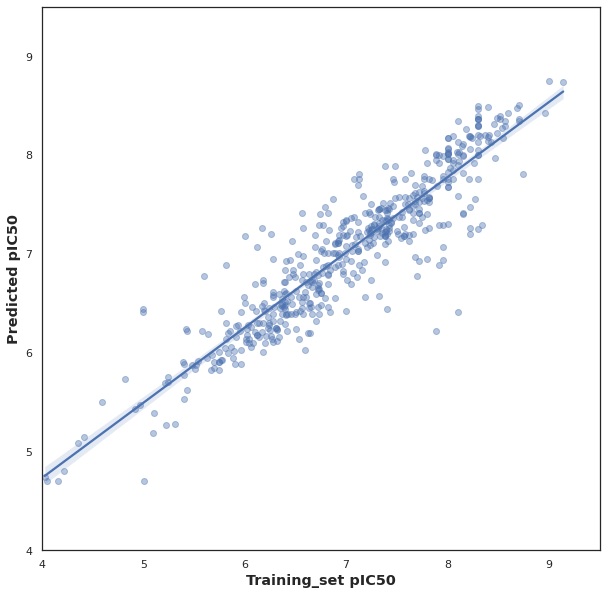

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_train, Y_train_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Training_set pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(4, 9.5)
ax.set_ylim(4, 9.5)
ax.figure.set_size_inches(10, 10)
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

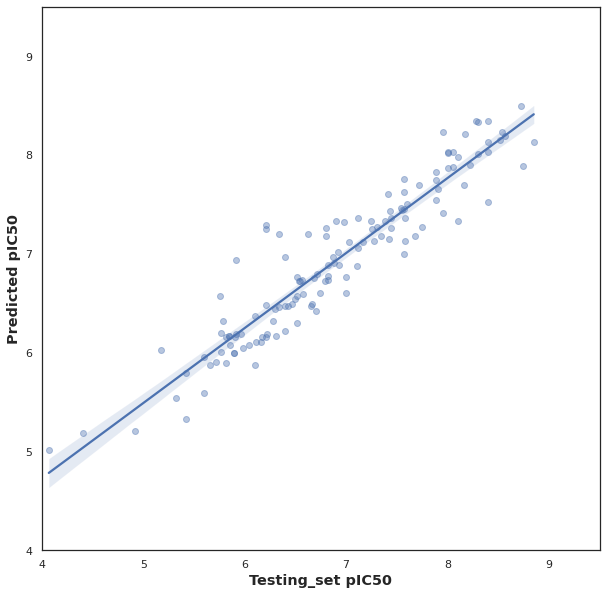

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_test_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Testing_set pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(4, 9.5)
ax.set_ylim(4, 9.5)
ax.figure.set_size_inches(10, 10)
plt.show

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators = 500 ,  random_state = 42)
rf_regressor.fit(X_train,Y_train)

import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import missingno as msno # plotting missing data
import seaborn as sns # plotting library

Y_pred = rf_regressor.predict(X_train)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = metrics.mean_absolute_error(Y_train, Y_train_pred)
MSE = metrics.mean_squared_error(Y_train, Y_train_pred)

# Printing the metrics
print('Suppport Vector Regression Accuracy: ', rf_regressor.score(X_train,Y_train_pred))
print('R2 square:',metrics.r2_score(Y_train, Y_train_pred))
print('MAE: ', MAE)
print('MSE: ', MSE)

Suppport Vector Regression Accuracy:  0.9750038624369147
R2 square: 0.8392524915446872
MAE:  0.2586946322933891
MSE:  0.1333847283932145


In [ ]:
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 42)
rf_regressor.fit(X_train,Y_train)

import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import missingno as msno # plotting missing data
import seaborn as sns # plotting library

Y_pred = rf_regressor.predict(X_train)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = metrics.mean_absolute_error(Y_test, Y_test_pred)
MSE = metrics.mean_squared_error(Y_test, Y_test_pred)

# Printing the metrics
print('Suppport Vector Regression Accuracy: ', rf_regressor.score(X_test,Y_test))
print('R2 square:',metrics.r2_score(Y_test, Y_test_pred))
print('MAE: ', MAE)
print('MSE: ', MSE)

Suppport Vector Regression Accuracy:  0.38863551597371127
R2 square: 0.8674076117950522
MAE:  0.2501722829947829
MSE:  0.12314026482063883


**MLP modeling**

In [ ]:
from sklearn.neural_network import MLPRegressor
clf3 = MLPRegressor()
clf3 = clf.fit(X_train, Y_train)

# define the model
model = MLPRegressor()

# fit the model
model.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

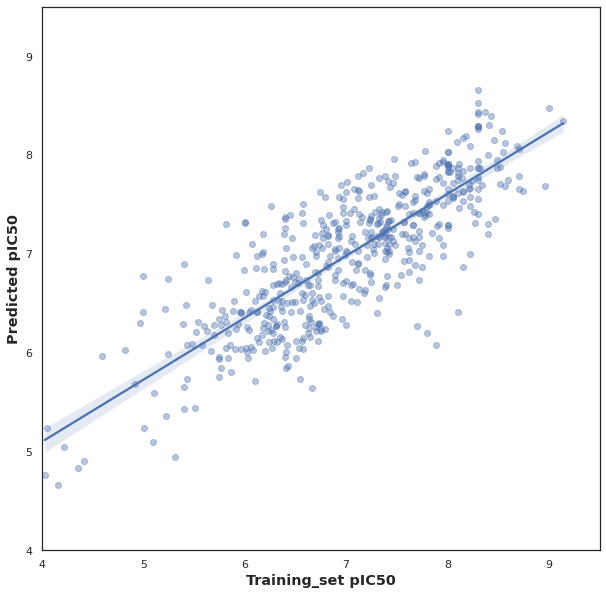

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_train, Y_train_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Training_set pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(4, 9.5)
ax.set_ylim(4, 9.5)
ax.figure.set_size_inches(10, 10)
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

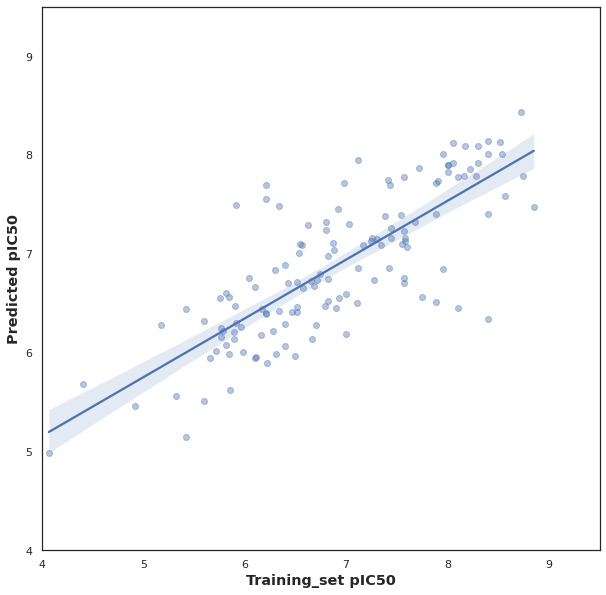

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_test_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Training_set pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(4, 9.5)
ax.set_ylim(4, 9.5)
ax.figure.set_size_inches(10, 10)
plt.show

In [ ]:
#evaluation of training set
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import missingno as msno # plotting missing data
import seaborn as sns # plotting library

Y_pred = clf3.predict(X_train)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = metrics.mean_absolute_error(Y_train, Y_train_pred)
MSE = metrics.mean_squared_error(Y_train, Y_train_pred)

# Printing the metrics
print('Suppport Vector Regression Accuracy: ', clf3.score(X_train,Y_train_pred))
print('R2 square:',metrics.r2_score(Y_train, Y_train_pred))
print('MAE: ', MAE)
print('MSE: ', MSE)

Suppport Vector Regression Accuracy:  0.6066918033425268
R2 square: 0.6724038344462435
MAE:  0.404506920995303
MSE:  0.27183205503426977


In [ ]:
#evaluation of test set
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import missingno as msno # plotting missing data
import seaborn as sns # plotting library

Y_pred = clf3.predict(X_train)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = metrics.mean_absolute_error(Y_test, Y_test_pred)
MSE = metrics.mean_squared_error(Y_test, Y_test_pred)

# Printing the metrics
print('Suppport Vector Regression Accuracy: ', clf3.score(X_test,Y_test))
print('R2 square:',metrics.r2_score(Y_test, Y_test_pred))
print('MAE: ', MAE)
print('MSE: ', MSE)

Suppport Vector Regression Accuracy:  0.21774005251776707
R2 square: 0.6251708589539746
MAE:  0.44632749587132664
MSE:  0.34810866834645193


### **3.Shap explainer**

In [ ]:
! pip install shap
import shap

     |████████████████████████████████| 371 kB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509247 sha256=cee1f409f933d8fb62a3ca161e7192712653477bea2d695138b609bae6544761
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


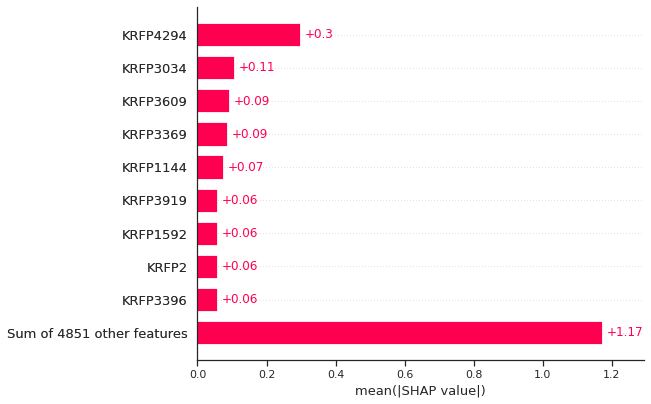

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X[:4860])
shap.plots.bar(shap_values)

In [ ]:
! pip install initjs()
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values, X_test)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: ` pip install initjs()'


AssertionError: ignored

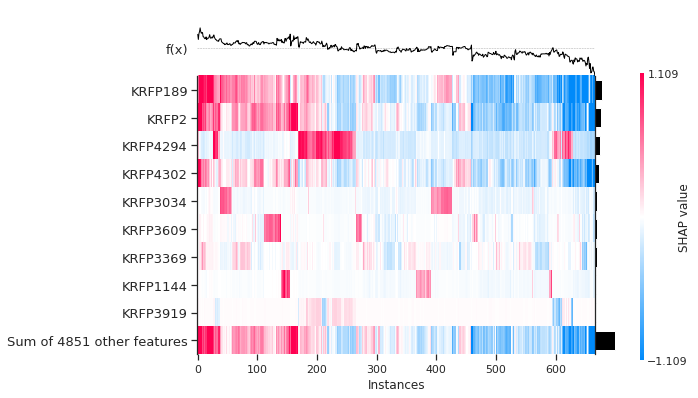

In [ ]:
#global summary heatmap
shap.plots.heatmap(shap_values)

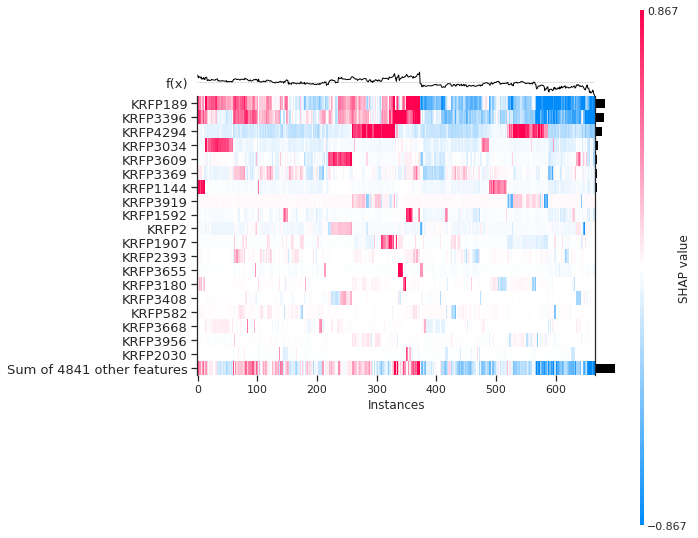

In [ ]:
shap.plots.heatmap(shap_values, max_display=20)

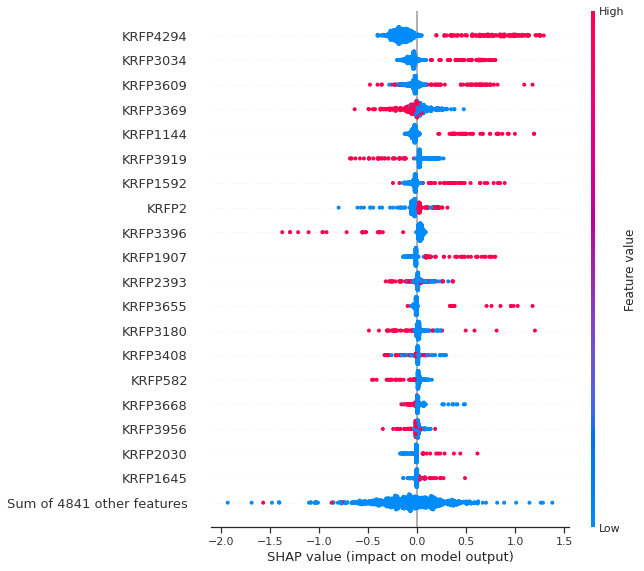

In [ ]:
#beeswarm 
shap.plots.beeswarm(shap_values, max_display=20)

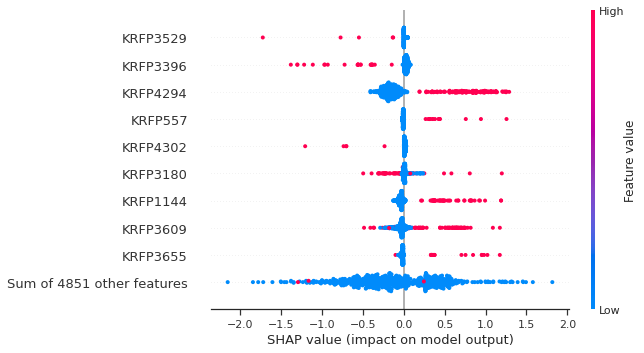

In [ ]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

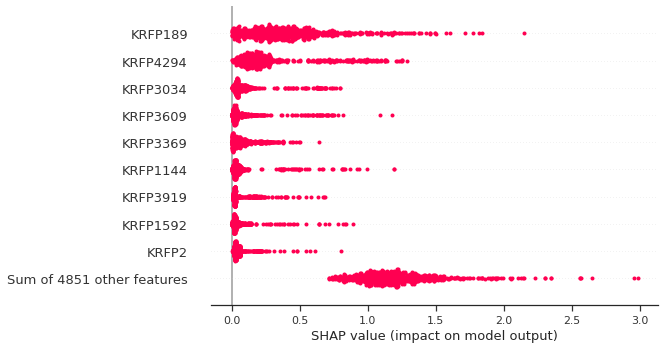

In [ ]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

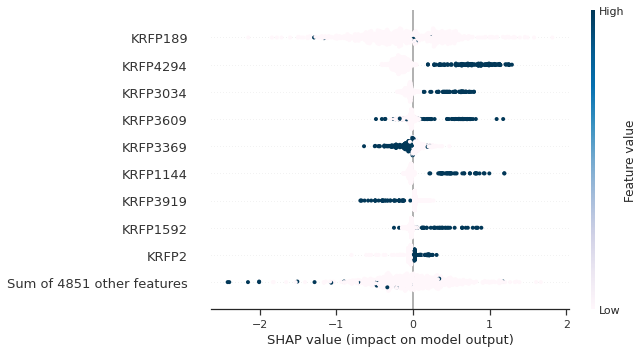

In [ ]:
import matplotlib.pyplot as plt
shap.plots.beeswarm(shap_values, color=plt.get_cmap("PuBu"))

### **4.Compare regressors**

In [ ]:
# COMPARE regressors
! pip install lazypredict

     |████████████████████████████████| 1.2 MB 10.1 MB/s 
     |████████████████████████████████| 248 kB 60.4 MB/s 
     |████████████████████████████████| 269 kB 54.7 MB/s 
     |████████████████████████████████| 10.1 MB 13.7 MB/s 
     |████████████████████████████████| 302 kB 49.1 MB/s 
     |████████████████████████████████| 72 kB 1.1 MB/s 
     |████████████████████████████████| 14.5 MB 8.2 kB/s 
     |████████████████████████████████| 6.8 MB 24.8 MB/s 
     |████████████████████████████████| 127.6 MB 7.2 kB/s 
     |████████████████████████████████| 25.9 MB 1.0 kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44635 sha256=edb2e46b0f80ec9ecaa7d539b4cd42b479a7d1e8dfa7a8b138026aeb8f9d0cc9
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully 

In [ ]:
import pandas as pd
import seaborn as sns
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
df3 = descriptors

X = descriptors.drop('Name', axis=1)
Y = df['pIC50']

X

In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:00<00:00, 60871.03it/s]


In [ ]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.87,0.91,0.27,0.82
DecisionTreeRegressor,0.87,0.91,0.27,0.08
ExtraTreeRegressor,0.87,0.91,0.27,0.08
GaussianProcessRegressor,0.87,0.91,0.27,0.19
XGBRegressor,0.86,0.91,0.28,0.50
RandomForestRegressor,0.79,0.86,0.35,0.73
BaggingRegressor,0.76,0.84,0.37,0.09
MLPRegressor,0.76,0.83,0.37,1.12
LGBMRegressor,0.67,0.78,0.43,0.10


In [ ]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


[(0.0, 1.0)]

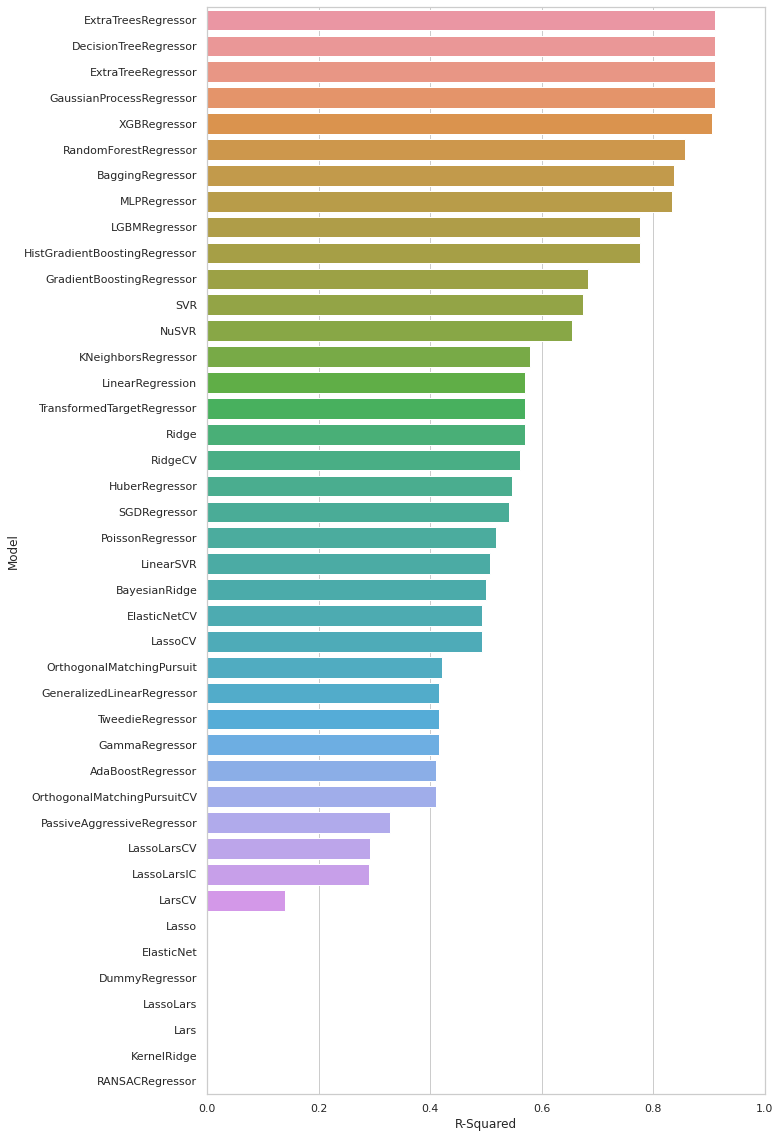

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(10, 20))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

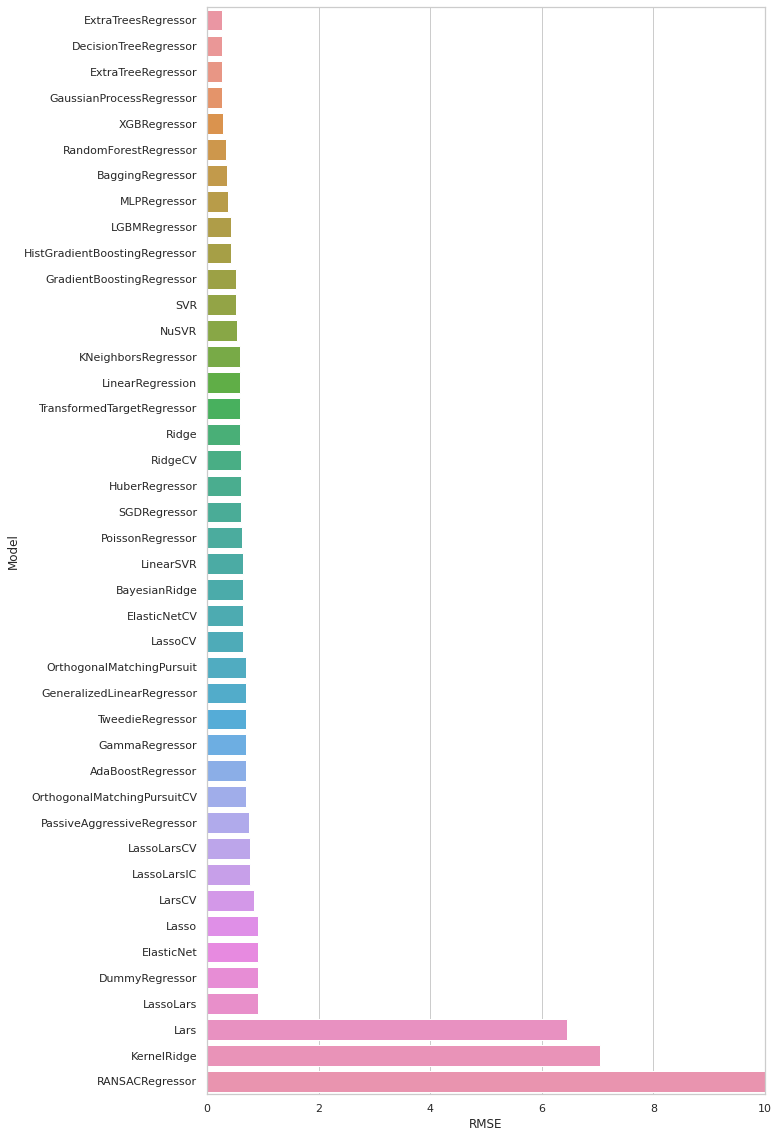

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 20))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))